<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/Deep_Learning_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as plt

In [2]:
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
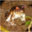

In [3]:
X_train_full[0]

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
X_valid=X_train_full[:5000]
y_valid = y_train_full[:5000]

In [6]:
X_train=X_train_full[5000:]
y_train=y_train_full[5000:]

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Nadam(learning_rate=1e-5),metrics=['accuracy'])

In [10]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint=keras.callbacks.ModelCheckpoint("my_model.h5",save_best_only=True)
callbacks = [early_stopping_cb,model_checkpoint]


In [11]:
his=model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1043 - loss: 37.8860

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.1043 - loss: 37.8688 - val_accuracy: 0.1292 - val_loss: 3.4264
Epoch 2/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1432 - loss: 3.0995

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1433 - loss: 3.0973 - val_accuracy: 0.1764 - val_loss: 2.5028
Epoch 3/50
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1808 - loss: 2.3972

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1809 - loss: 2.3967 - val_accuracy: 0.2096 - val_loss: 2.2144
Epoch 4/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2186 - loss: 2.1842

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2187 - loss: 2.1840 - val_accuracy: 0.2436 - val_loss: 2.0778
Epoch 5/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2482 - loss: 2.0680

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2482 - loss: 2.0678 - val_accuracy: 0.2694 - val_loss: 2.0005
Epoch 6/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2802 - loss: 1.9847

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2803 - loss: 1.9846 - val_accuracy: 0.2902 - val_loss: 1.9460
Epoch 7/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3022 - loss: 1.9246

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3022 - loss: 1.9245 - val_accuracy: 0.3058 - val_loss: 1.9058
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3192 - loss: 1.8799

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3192 - loss: 1.8799 - val_accuracy: 0.3222 - val_loss: 1.8697
Epoch 9/50
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3290 - loss: 1.8459

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3290 - loss: 1.8459 - val_accuracy: 0.3202 - val_loss: 1.8504
Epoch 10/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3414 - loss: 1.8138

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3414 - loss: 1.8138 - val_accuracy: 0.3362 - val_loss: 1.8278
Epoch 11/50
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3520 - loss: 1.7860

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3520 - loss: 1.7860 - val_accuracy: 0.3424 - val_loss: 1.8099
Epoch 12/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3616 - loss: 1.7607

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3616 - loss: 1.7607 - val_accuracy: 0.3504 - val_loss: 1.7950
Epoch 13/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3691 - loss: 1.7421

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3691 - loss: 1.7421 - val_accuracy: 0.3598 - val_loss: 1.7828
Epoch 14/50
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3737 - loss: 1.7231

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3737 - loss: 1.7231 - val_accuracy: 0.3618 - val_loss: 1.7684
Epoch 15/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3819 - loss: 1.7038

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3819 - loss: 1.7038 - val_accuracy: 0.3692 - val_loss: 1.7563
Epoch 16/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3888 - loss: 1.6881

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3888 - loss: 1.6881 - val_accuracy: 0.3702 - val_loss: 1.7502
Epoch 17/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3952 - loss: 1.6717

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3952 - loss: 1.6717 - val_accuracy: 0.3702 - val_loss: 1.7396
Epoch 18/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4023 - loss: 1.6574

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4023 - loss: 1.6574 - val_accuracy: 0.3810 - val_loss: 1.7336
Epoch 19/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4063 - loss: 1.6419

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4063 - loss: 1.6419 - val_accuracy: 0.3840 - val_loss: 1.7282
Epoch 20/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4117 - loss: 1.6300

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4117 - loss: 1.6300 - val_accuracy: 0.3866 - val_loss: 1.7227
Epoch 21/50
1404/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4172 - loss: 1.6163

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4172 - loss: 1.6163 - val_accuracy: 0.3896 - val_loss: 1.7162
Epoch 22/50
1399/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4220 - loss: 1.6039

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4220 - loss: 1.6039 - val_accuracy: 0.3876 - val_loss: 1.7113
Epoch 23/50
1396/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4258 - loss: 1.5924

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4258 - loss: 1.5924 - val_accuracy: 0.3900 - val_loss: 1.7092
Epoch 24/50
1394/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4301 - loss: 1.5818

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4301 - loss: 1.5818 - val_accuracy: 0.3888 - val_loss: 1.7059
Epoch 25/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4339 - loss: 1.5705

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4339 - loss: 1.5705 - val_accuracy: 0.3934 - val_loss: 1.7021
Epoch 26/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4379 - loss: 1.5609

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4379 - loss: 1.5609 - val_accuracy: 0.3960 - val_loss: 1.6979
Epoch 27/50
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4412 - loss: 1.5507

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4412 - loss: 1.5508 - val_accuracy: 0.3960 - val_loss: 1.6955
Epoch 28/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4468 - loss: 1.5415

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4468 - loss: 1.5415 - val_accuracy: 0.3956 - val_loss: 1.6915
Epoch 29/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4508 - loss: 1.5320

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4508 - loss: 1.5320 - val_accuracy: 0.3930 - val_loss: 1.6895
Epoch 30/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4549 - loss: 1.5233

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4549 - loss: 1.5233 - val_accuracy: 0.3950 - val_loss: 1.6888
Epoch 31/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 1.5147

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4563 - loss: 1.5148 - val_accuracy: 0.3960 - val_loss: 1.6884
Epoch 32/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4597 - loss: 1.5062

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4597 - loss: 1.5062 - val_accuracy: 0.4004 - val_loss: 1.6879
Epoch 33/50
1394/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4640 - loss: 1.4981

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4639 - loss: 1.4982 - val_accuracy: 0.4022 - val_loss: 1.6859
Epoch 34/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4663 - loss: 1.4907

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4663 - loss: 1.4907 - val_accuracy: 0.4032 - val_loss: 1.6857
Epoch 35/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4702 - loss: 1.4833

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4702 - loss: 1.4833 - val_accuracy: 0.4032 - val_loss: 1.6851
Epoch 36/50
1396/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4734 - loss: 1.4750

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4734 - loss: 1.4751 - val_accuracy: 0.4062 - val_loss: 1.6838
Epoch 37/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4755 - loss: 1.4675

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4755 - loss: 1.4675 - val_accuracy: 0.4058 - val_loss: 1.6824
Epoch 38/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4789 - loss: 1.4610 - val_accuracy: 0.4050 - val_loss: 1.6830
Epoch 39/50
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4820 - loss: 1.4536

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4820 - loss: 1.4537 - val_accuracy: 0.4068 - val_loss: 1.6814
Epoch 40/50
1396/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4836 - loss: 1.4465

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4836 - loss: 1.4466 - val_accuracy: 0.4064 - val_loss: 1.6812
Epoch 41/50
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4856 - loss: 1.4398

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4856 - loss: 1.4399 - val_accuracy: 0.4068 - val_loss: 1.6804
Epoch 42/50
1399/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4888 - loss: 1.4335

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4888 - loss: 1.4335 - val_accuracy: 0.4064 - val_loss: 1.6803
Epoch 43/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4922 - loss: 1.4271 - val_accuracy: 0.4070 - val_loss: 1.6810
Epoch 44/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4948 - loss: 1.4208 - val_accuracy: 0.4074 - val_loss: 1.6819
Epoch 45/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4967 - loss: 1.4146 - val_accuracy: 0.4108 - val_loss: 1.6843
Epoch 46/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4993 - loss: 1.4089 - val_accuracy: 0.4064 - val_loss: 1.6843
Epoch 47/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5010 - loss: 1.4026 - val_accuracy: 0.4078 - val_loss: 1.6853
Epoch 48/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5027 - loss: 1.3969 - val_accuracy: 0.4060 - val_loss: 1.6872
Epoch 49/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5043 - loss: 1.3910 - val

In [12]:
model = keras.models.load_model('my_model.h5')
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4121 - loss: 1.6432


[1.6444886922836304, 0.4196000099182129]

With BatchNormalization

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
  model.add(keras.layers.Dense(100,kernel_initializer='he_normal'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Nadam(learning_rate=1e-3),metrics=['accuracy'])

In [16]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint=keras.callbacks.ModelCheckpoint("my_model2.h5",save_best_only=True)
callbacks = [early_stopping_cb,model_checkpoint]


In [17]:
his=model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1417 - loss: 2.5685

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.1417 - loss: 2.5684 - val_accuracy: 0.2298 - val_loss: 2.1555
Epoch 2/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2348 - loss: 2.1390

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2349 - loss: 2.1389 - val_accuracy: 0.2766 - val_loss: 1.9908
Epoch 3/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2839 - loss: 1.9887

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2839 - loss: 1.9886 - val_accuracy: 0.3098 - val_loss: 1.9035
Epoch 4/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3154 - loss: 1.8997

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3154 - loss: 1.8997 - val_accuracy: 0.3308 - val_loss: 1.8460
Epoch 5/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3425 - loss: 1.8342

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3426 - loss: 1.8342 - val_accuracy: 0.3458 - val_loss: 1.8060
Epoch 6/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3632 - loss: 1.7821

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3632 - loss: 1.7821 - val_accuracy: 0.3596 - val_loss: 1.7782
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3815 - loss: 1.7375

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3815 - loss: 1.7375 - val_accuracy: 0.3676 - val_loss: 1.7578
Epoch 8/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3967 - loss: 1.6990

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3967 - loss: 1.6989 - val_accuracy: 0.3702 - val_loss: 1.7420
Epoch 9/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4122 - loss: 1.6641

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4122 - loss: 1.6641 - val_accuracy: 0.3748 - val_loss: 1.7305
Epoch 10/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4231 - loss: 1.6334

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4231 - loss: 1.6334 - val_accuracy: 0.3794 - val_loss: 1.7221
Epoch 11/50
1404/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4323 - loss: 1.6054

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4323 - loss: 1.6054 - val_accuracy: 0.3802 - val_loss: 1.7169
Epoch 12/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4419 - loss: 1.5800

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4419 - loss: 1.5800 - val_accuracy: 0.3818 - val_loss: 1.7127
Epoch 13/50
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4520 - loss: 1.5552

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4520 - loss: 1.5552 - val_accuracy: 0.3832 - val_loss: 1.7108
Epoch 14/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4600 - loss: 1.5320

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4600 - loss: 1.5320 - val_accuracy: 0.3824 - val_loss: 1.7093
Epoch 15/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4682 - loss: 1.5092 - val_accuracy: 0.3854 - val_loss: 1.7094
Epoch 16/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4754 - loss: 1.4884 - val_accuracy: 0.3862 - val_loss: 1.7099
Epoch 17/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4850 - loss: 1.4664 - val_accuracy: 0.3908 - val_loss: 1.7116
Epoch 18/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4924 - loss: 1.4460 - val_accuracy: 0.3874 - val_loss: 1.7150
Epoch 19/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5002 - loss: 1.4263 - val_accuracy: 0.3884 - val_loss: 1.7172
Epoch 20/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5091 - loss: 1.4066 - val_accuracy: 0.3900 - val_loss: 1.7216
Epoch 21/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5155 - loss: 1.3870 -

In [18]:
model = keras.models.load_model('my_model2.h5')
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4018 - loss: 1.7029


[1.7093126773834229, 0.3952000141143799]

With Selu

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
  model.add(keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Nadam(learning_rate=1e-3),metrics=['accuracy'])

In [22]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint=keras.callbacks.ModelCheckpoint("my_model3.h5",save_best_only=True)
callbacks = [early_stopping_cb,model_checkpoint]


In [23]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std
X_valid_scaled = (X_valid-X_mean)/X_std


In [24]:
his=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_valid_scaled,y_valid),callbacks=callbacks)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2418 - loss: 2.1137

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2418 - loss: 2.1136 - val_accuracy: 0.3306 - val_loss: 1.8312
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3519 - loss: 1.8020

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3519 - loss: 1.8020 - val_accuracy: 0.3806 - val_loss: 1.7671
Epoch 3/50
1400/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3889 - loss: 1.7130

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3889 - loss: 1.7130 - val_accuracy: 0.3916 - val_loss: 1.7394
Epoch 4/50
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4139 - loss: 1.6621

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4139 - loss: 1.6620 - val_accuracy: 0.4050 - val_loss: 1.7052
Epoch 5/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4273 - loss: 1.6046

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4273 - loss: 1.6046 - val_accuracy: 0.4414 - val_loss: 1.6485
Epoch 6/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4445 - loss: 1.5748

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4445 - loss: 1.5748 - val_accuracy: 0.4540 - val_loss: 1.6041
Epoch 7/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4601 - loss: 1.5406

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4601 - loss: 1.5407 - val_accuracy: 0.4530 - val_loss: 1.5893
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4772 - loss: 1.5033 - val_accuracy: 0.4574 - val_loss: 1.6137
Epoch 9/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4892 - loss: 1.4658 - val_accuracy: 0.4570 - val_loss: 1.6002
Epoch 10/50
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 1.4454

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4946 - loss: 1.4455 - val_accuracy: 0.4730 - val_loss: 1.5611
Epoch 11/50
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5039 - loss: 1.4173

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5039 - loss: 1.4174 - val_accuracy: 0.4806 - val_loss: 1.5514
Epoch 12/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5122 - loss: 1.4028 - val_accuracy: 0.4652 - val_loss: 1.5851
Epoch 13/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5247 - loss: 1.3704 - val_accuracy: 0.4752 - val_loss: 1.5604
Epoch 14/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5333 - loss: 1.3431 - val_accuracy: 0.4842 - val_loss: 1.5562
Epoch 15/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5383 - loss: 1.4335 - val_accuracy: 0.4382 - val_loss: 1.6385
Epoch 16/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4726 - loss: 3.3254 - val_accuracy: 0.4178 - val_loss: 1.6498
Epoch 17/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4713 - loss: 1.4875 - val_accuracy: 0.4454 - val_loss: 1.5784
Epoch 18/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5000 - loss: 1.4043 - val_

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5596 - loss: 1.2649 - val_accuracy: 0.4816 - val_loss: 1.5476
Epoch 24/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5661 - loss: 1.2545 - val_accuracy: 0.4852 - val_loss: 1.5819
Epoch 25/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5671 - loss: 1.2401 - val_accuracy: 0.4934 - val_loss: 1.5527
Epoch 26/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5749 - loss: 1.2227 - val_accuracy: 0.5022 - val_loss: 1.5676
Epoch 27/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5810 - loss: 1.2078 - val_accuracy: 0.4990 - val_loss: 1.5739
Epoch 28/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5846 - loss: 1.1973 - val_accuracy: 0.4962 - val_loss: 1.5742
Epoch 29/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5885 - loss: 1.1908 - val_accuracy: 0.4826 - val_loss: 1.6469
Epoch 30/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5887 - loss: 1.1980 - val_

In [25]:
model = keras.models.load_model('my_model3.h5')
model.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1791 - loss: 72.4017


[73.09745788574219, 0.17820000648498535]

With Alpha Dropout

In [26]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
  model.add(keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10,activation='softmax'))

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Nadam(learning_rate=1e-3),metrics=['accuracy'])

In [29]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
model_checkpoint=keras.callbacks.ModelCheckpoint("my_model4.h5",save_best_only=True)
callbacks = [early_stopping_cb,model_checkpoint]


In [30]:
his=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_valid_scaled,y_valid),callbacks=callbacks)

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2379 - loss: 2.1343

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2379 - loss: 2.1342 - val_accuracy: 0.3106 - val_loss: 1.8747
Epoch 2/50
1400/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3266 - loss: 1.8297

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3266 - loss: 1.8296 - val_accuracy: 0.3746 - val_loss: 1.7652
Epoch 3/50
1400/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3553 - loss: 1.7544

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3553 - loss: 1.7544 - val_accuracy: 0.3670 - val_loss: 1.7163
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3755 - loss: 1.7021 - val_accuracy: 0.3884 - val_loss: 1.7259
Epoch 5/50
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3869 - loss: 1.6741

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3869 - loss: 1.6741 - val_accuracy: 0.4052 - val_loss: 1.6948
Epoch 6/50
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4039 - loss: 1.6463

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4039 - loss: 1.6462 - val_accuracy: 0.4236 - val_loss: 1.6910
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4170 - loss: 1.6127 - val_accuracy: 0.4232 - val_loss: 1.7255
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4161 - loss: 1.6026 - val_accuracy: 0.4152 - val_loss: 1.7071
Epoch 9/50
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4340 - loss: 1.5700

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4340 - loss: 1.5699 - val_accuracy: 0.4402 - val_loss: 1.6395
Epoch 10/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4387 - loss: 1.5990 - val_accuracy: 0.4350 - val_loss: 1.6472
Epoch 11/50
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4581 - loss: 1.5250

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4581 - loss: 1.5250 - val_accuracy: 0.4518 - val_loss: 1.6101
Epoch 12/50
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4684 - loss: 1.4905

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4684 - loss: 1.4905 - val_accuracy: 0.4600 - val_loss: 1.6037
Epoch 13/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4755 - loss: 1.4664 - val_accuracy: 0.4502 - val_loss: 1.6630
Epoch 14/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4879 - loss: 1.4393 - val_accuracy: 0.4592 - val_loss: 1.6679
Epoch 15/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4902 - loss: 1.4368 - val_accuracy: 0.4606 - val_loss: 1.6313
Epoch 16/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5012 - loss: 1.4152 - val_accuracy: 0.4744 - val_loss: 1.6567
Epoch 17/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4919 - loss: 1.4417 - val_accuracy: 0.4656 - val_loss: 1.7022
Epoch 18/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5027 - loss: 1.4111 - val_accuracy: 0.4660 - val_loss: 1.6757
Epoch 19/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5179 - loss: 1.3795 - val_

In [31]:
model = keras.models.load_model('my_model4.h5')
model.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4583 - loss: 1.5725


[1.5720840692520142, 0.45989999175071716]